In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def predict(x,w):
	'''
	x: 一组特征(n,)\n
	w: 模型的参数(n+1,) 最后一个是截距项
	'''
	if(len(x) != len(w)-1):
		raise ValueError("特征与参数不匹配！")
	
	return (x*w[:len(w)-1]).sum() + w[-1]

In [3]:
def cost(x,w,y):
	'''
	x: 样本(m,n)\n
	w: 预测参数(n,)\n
	y: 真实标签(m,)
	'''
	predictions = np.array([predict(z,w) for z in x])
	return ((predictions - y)**2).sum() * 1/(2*x.shape[0])

In [4]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
b = [1,1,1]

b@arr

array([12, 15, 18])

In [29]:
def gradian_descent(w,x,y,alpha,iter=1000):
	'''
	x: 样本(m,n)\n
	w: 预测参数(n,)\n
	y: 真实标签(m,)\n
	alpha: 学习率\n
	iter: 最大迭代次数
	'''

	temp = w
	iter_cnt = 0
	costs = []

	for _ in range(iter):
		iter_cnt += 1
		c = temp

		#print('temp:',temp.shape)
		#print(x[1].shape)
		predictions = [predict(z,temp) for z in x]
		errors = predictions - y

		grad_w = (1/x.shape[0]) * (errors @ x)
		grad_b = (1/x.shape[0]) * errors.sum()

		gradiant = np.append(grad_w, grad_b)

		temp = temp-alpha*gradiant
		
		costs.append(cost(x,temp,y))

		if(((c-temp)**2).sum() < 1e-16):#sklearn的精度大概在这个量级……
			break

	print(f'iter cnt: {iter_cnt}')
	return temp,costs,iter_cnt

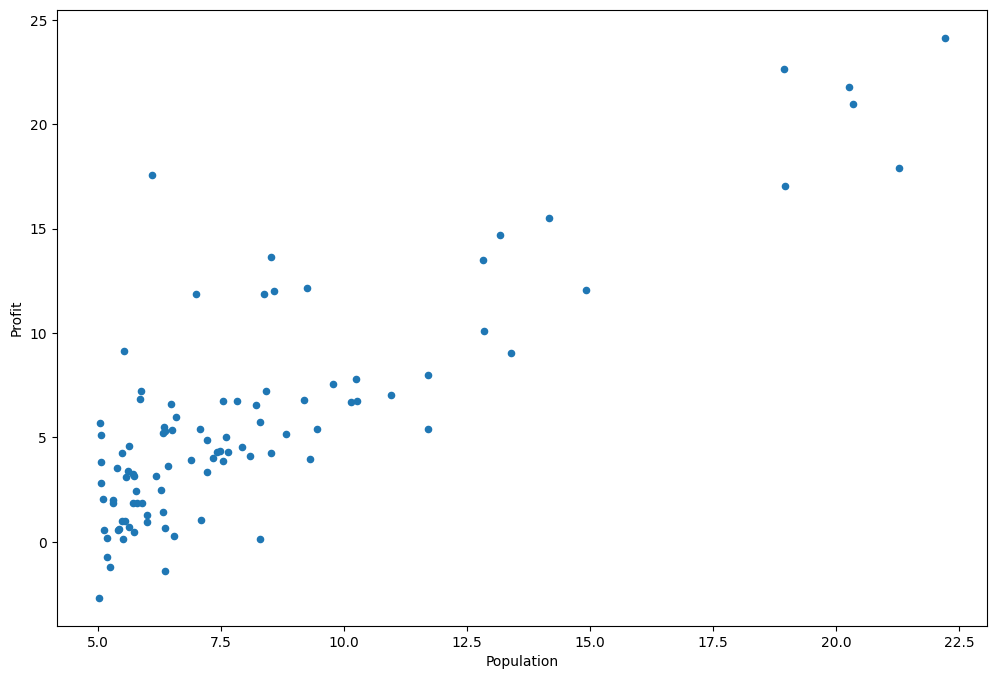

In [6]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

data.describe()

data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

In [7]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
Y = data.iloc[:, cols-1:cols]

X = X.values
Y = Y.values.reshape((Y.shape[0],))

In [8]:
w = np.array([0,0])
predict(X[1],w)
#len(w),len(X[1])
#len(X[1]) != len(w)-1

cost(X,w,Y)

32.072733877455676

iter cnt: 3314
(97, 1) (97,)
[ 1.19303341 -3.89577859]


<function matplotlib.pyplot.show(close=None, block=None)>

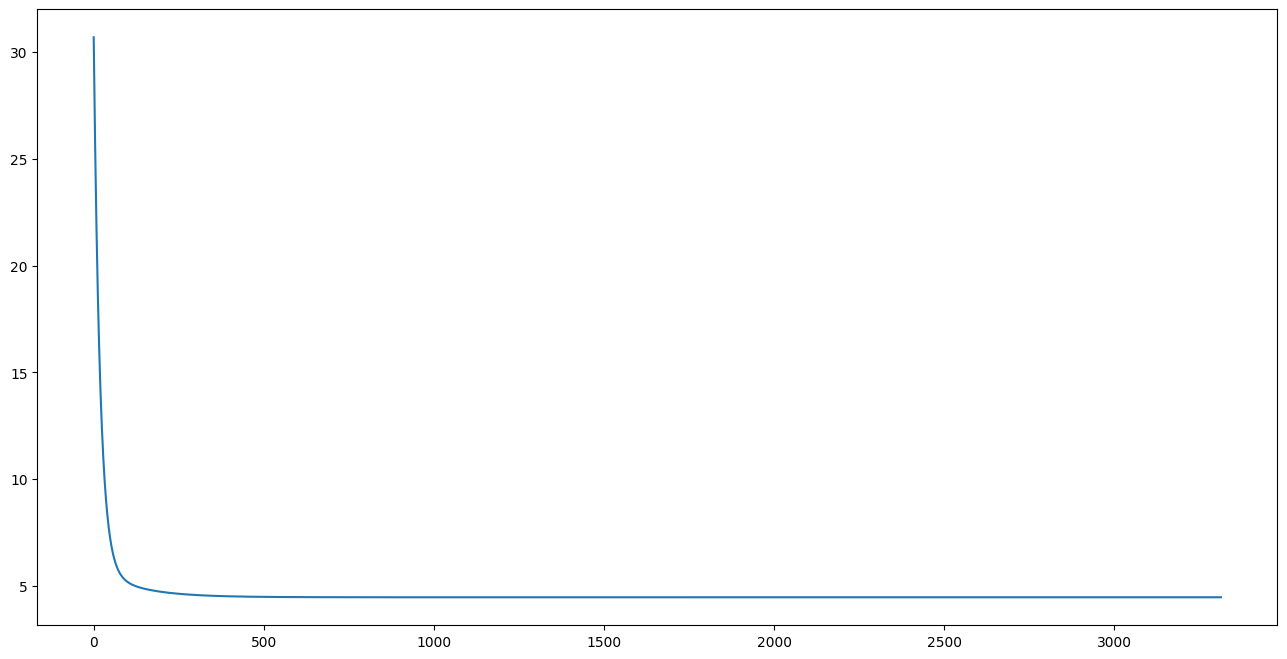

In [66]:
#w = np.array([1.19303364,-3.89578088])#这是sklearn中线性回归模型的计算结果
w = np.array([0,0])
g,costs, iter_cnt = gradian_descent(w,X,Y,0.024,5000)
print(X.shape,Y.shape)
print(g)

plt.figure(figsize=(16,8))
plt.plot(range(iter_cnt),costs)
plt.show

In [31]:
costs

[16.769642371667455,
 10.407579751768978,
 7.759183480302341,
 6.653287534646751,
 6.188105823037991,
 5.989084519364203,
 5.9006537729257875,
 5.858197920163226,
 5.834878785201405,
 5.819548934223245,
 5.807578027277278,
 5.797042577385663,
 5.787143381054755,
 5.777548203870704,
 5.768118767375579,
 5.758797354060333,
 5.749559709152847,
 5.740395478534908,
 5.731300083688731,
 5.7222713469714925,
 5.713308089921204,
 5.704409551053921,
 5.695575144033777,
 5.686804357215719,
 5.678096711906953,
 5.669451745017105,
 5.660869001838246,
 5.6523480330323945,
 5.643888393366726,
 5.635489641174721,
 5.627151338118978,
 5.618873049079402,
 5.6106543420935395,
 5.602494788318709,
 5.59439396200325,
 5.586351440461655,
 5.578366804051419,
 5.570439636150689,
 5.562569523136332,
 5.554756054362272,
 5.5469988221380415,
 5.539297421707482,
 5.531651451227627,
 5.5240605117477335,
 5.5165242071884535,
 5.509042144321186,
 5.501613932747542,
 5.494239184878978,
 5.486917515916582,
 5.479648543

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

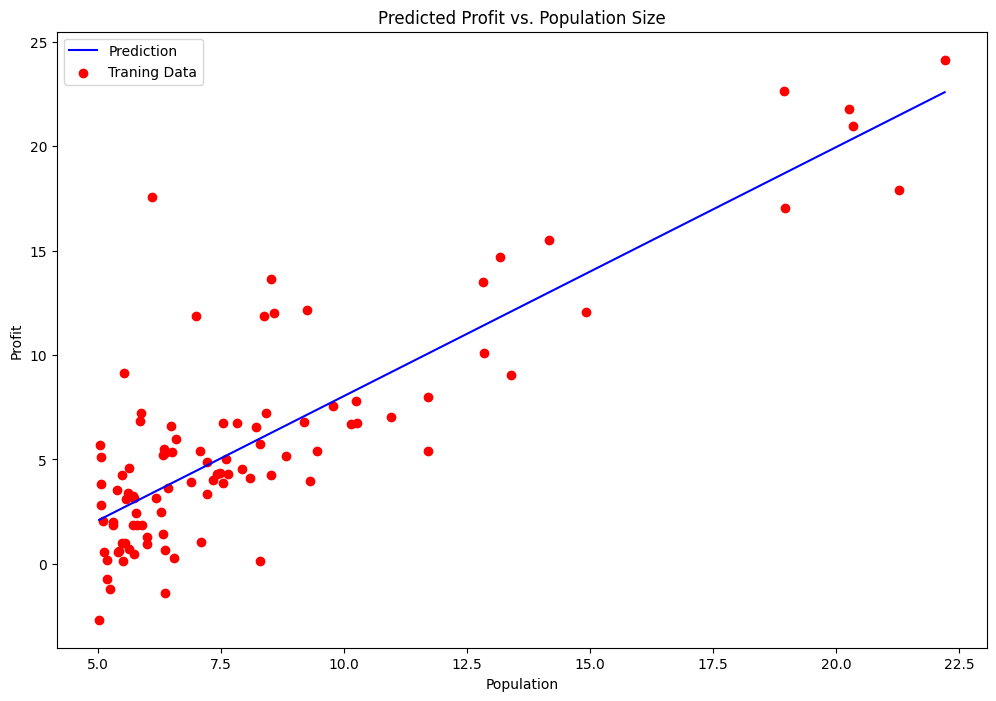

In [15]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[1] + (g[0] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'b', label='Prediction')
ax.scatter(data.Population, data.Profit, c='red',label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

# 特征工程

(100, 1)
(100, 1)
(100, 1)


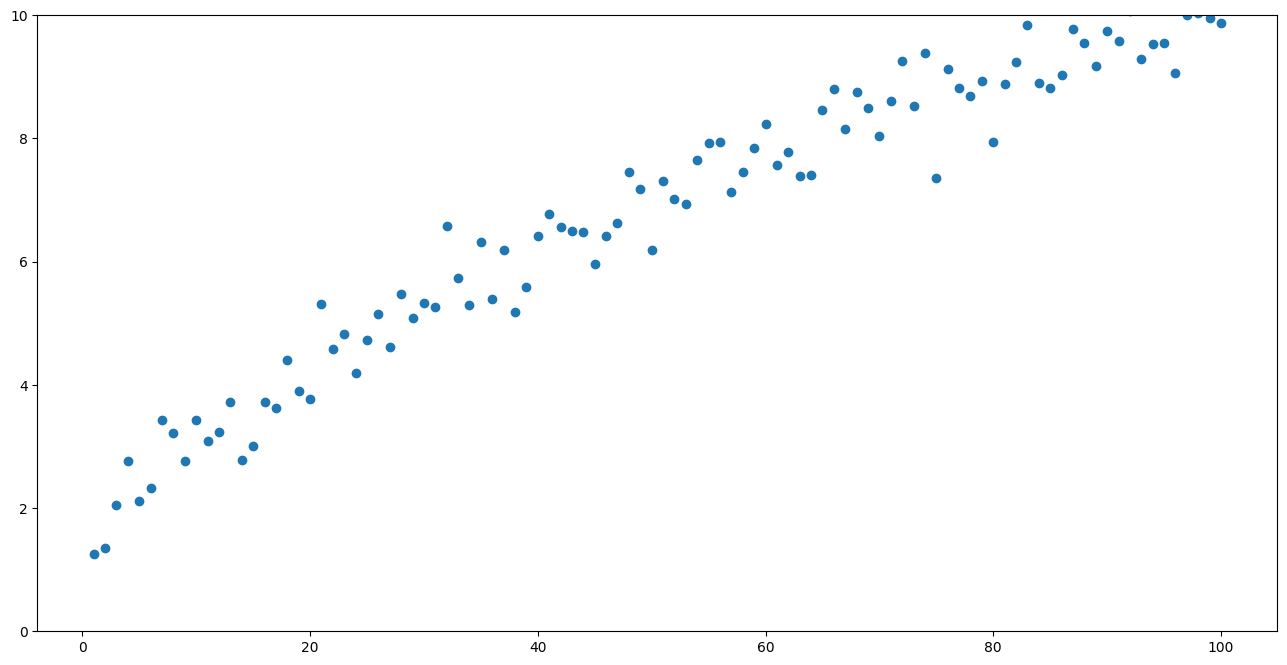

In [87]:
rng = np.random.RandomState(42)

x = np.array(range(1,101)).reshape(-1,1)
print(x.shape)

epsilon = rng.randn(100).reshape(-1,1)*0.5
print(epsilon.shape)

y = np.sqrt(x) + epsilon
print(y.shape)

fig = plt.figure(figsize=(16,8))
plt.ylim(0,10)
plt.scatter(x,y)

只取一个特征，即x本身，进行拟合

(100, 1) (100,)
iter cnt: 5000
[0.11452722 0.30646101]


<function matplotlib.pyplot.show(close=None, block=None)>

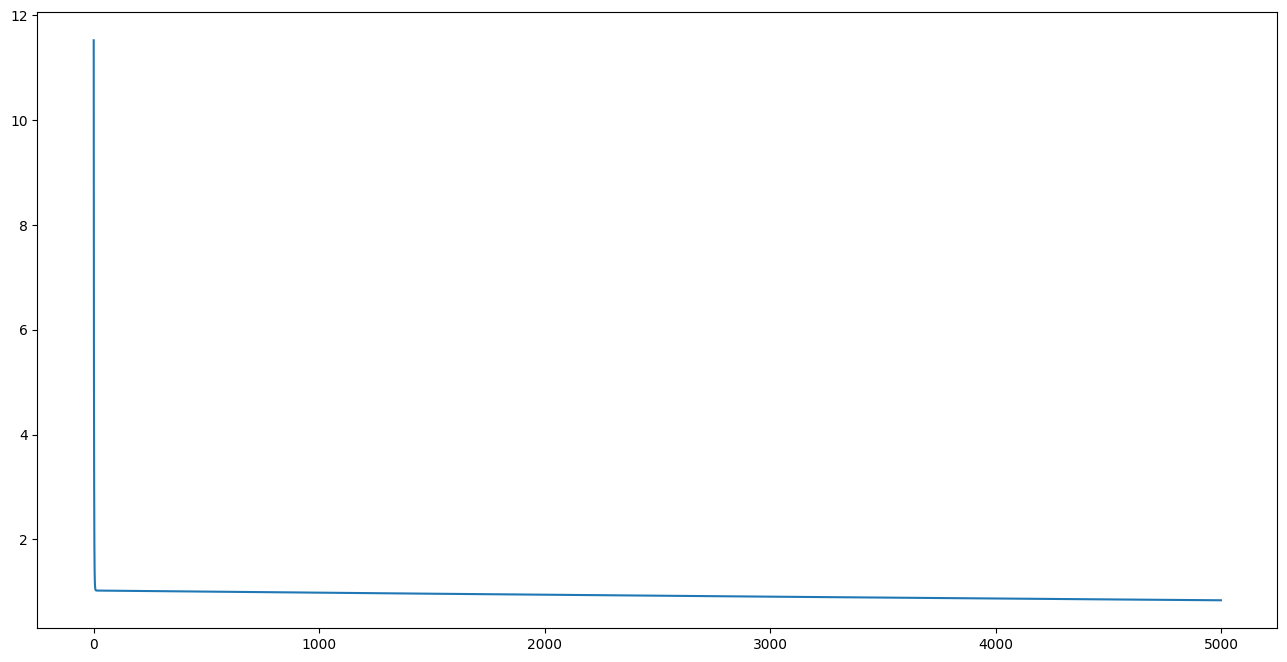

In [91]:
y = y.flatten()
w = np.array([0,0])

print(x.shape,y.shape)
g,costs, iter_cnt = gradian_descent(w,x,y,0.0001,5000)
print(g)

plt.figure(figsize=(16,8))
plt.plot(range(iter_cnt),costs)
plt.show

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

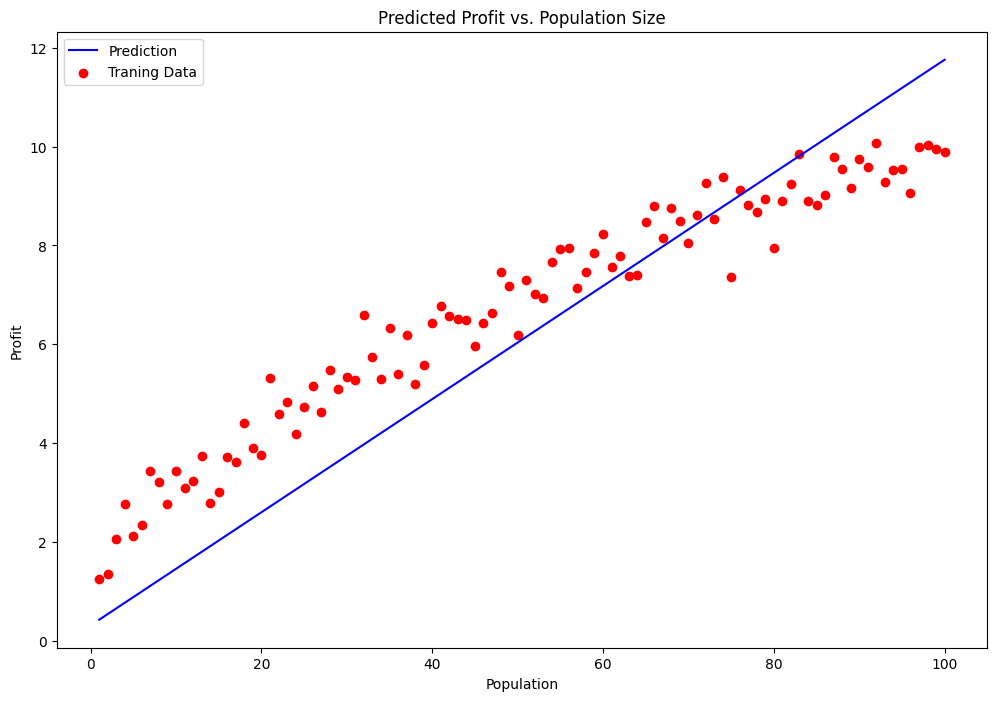

In [92]:
x_ax = np.linspace(x.min(), x.max(), 100)
f = g[1] + (g[0] * x_ax)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_ax, f, 'b', label='Prediction')
ax.scatter(x, y, c='red',label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

加一个新特征，即$\sqrt{x}$，进行拟合

(100, 1) (100,)
iter cnt: 5000
[ 0.00424931  0.95967317 -0.00172051]


<function matplotlib.pyplot.show(close=None, block=None)>

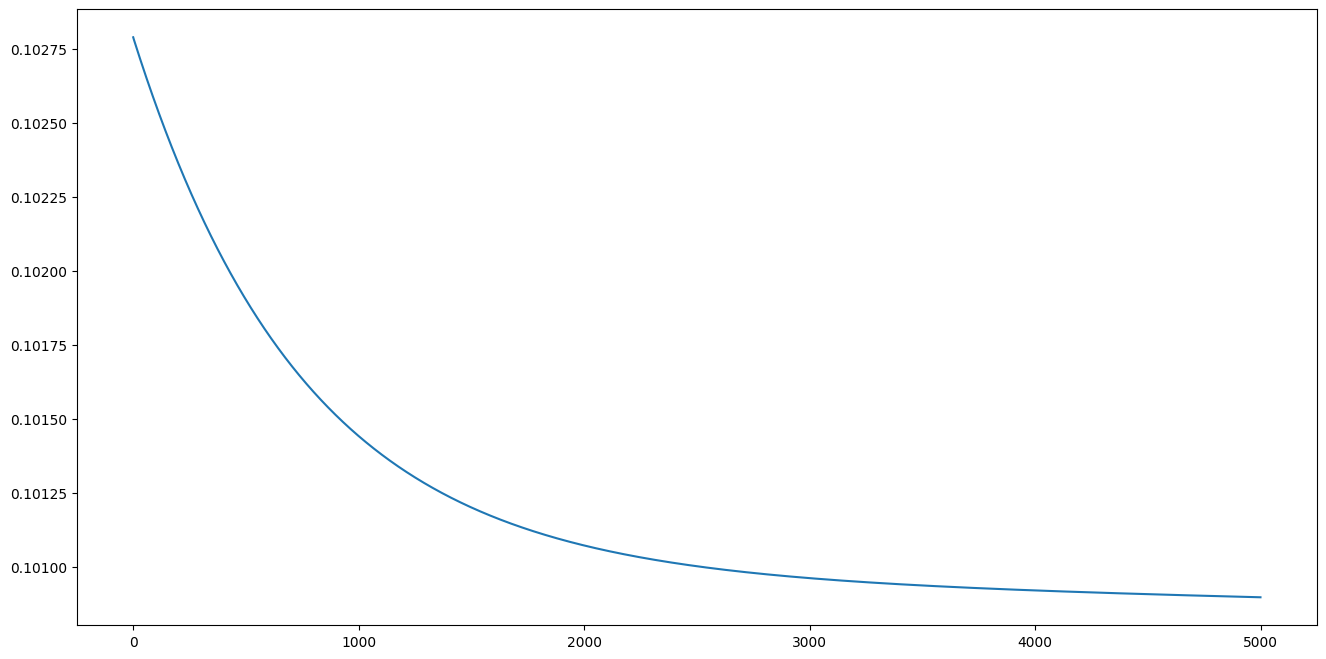

In [111]:
new = np.sqrt(x)
new = np.hstack((x,new))

y = y.flatten()
w = np.array([0,1,0])

print(x.shape,y.shape)
g,costs, iter_cnt = gradian_descent(w,new,y,0.0003,5000)
print(g)

plt.figure(figsize=(16,8))
plt.plot(range(iter_cnt),costs)
plt.show

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(new,y)

print(model.coef_,model.intercept_)

[0.01255931 0.85005977] 0.32062466701608017


Text(0.5, 1.0, 'Predicted Profit vs. Population Size -- by professional model')

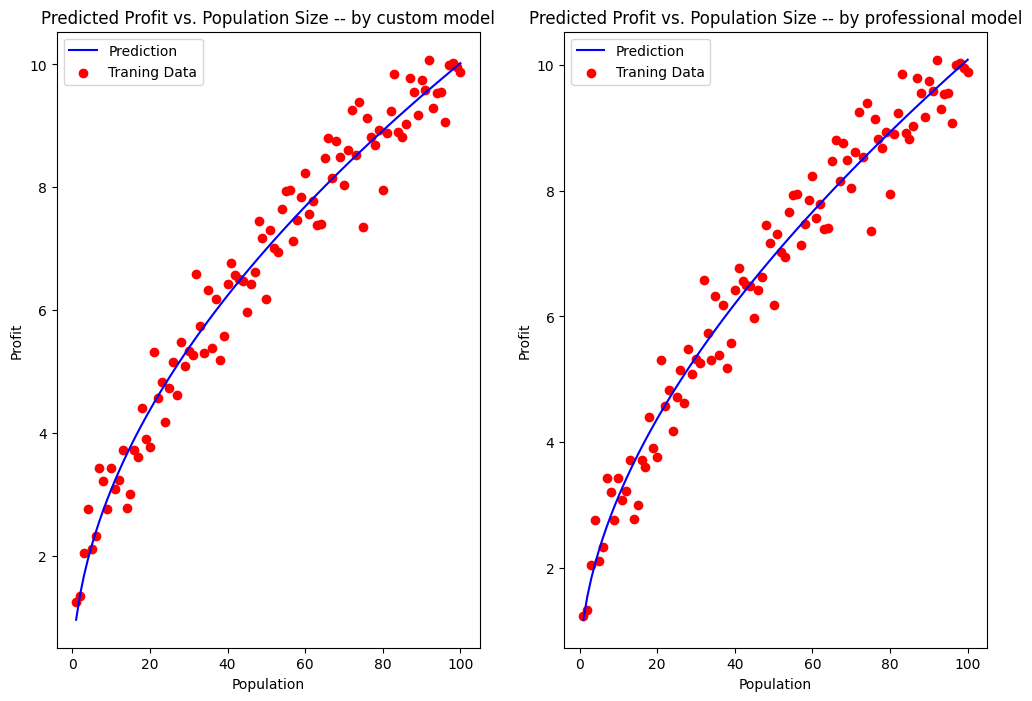

In [117]:
x_ax = np.linspace(x.min(), x.max(), 100)
f1 = g[2] + (g[0] * x_ax) + (g[1] * np.sqrt(x_ax))
f2 = 0.32062466701608017 + (0.01255931 * x_ax) + (0.85005977 * np.sqrt(x_ax))

fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(12,8))
ax[0].plot(x_ax, f1, 'b', label='Prediction')
ax[0].scatter(x, y, c='red',label='Traning Data')
ax[0].legend(loc=2)
ax[0].set_xlabel('Population')
ax[0].set_ylabel('Profit')
ax[0].set_title('Predicted Profit vs. Population Size -- by custom model')

ax[1].plot(x_ax, f2, 'b', label='Prediction')
ax[1].scatter(x, y, c='red',label='Traning Data')
ax[1].legend(loc=2)
ax[1].set_xlabel('Population')
ax[1].set_ylabel('Profit')
ax[1].set_title('Predicted Profit vs. Population Size -- by professional model')

In [122]:
np.linalg.norm(f1[90:]-f2[90:],ord=2)

0.1440416519296841